In [1]:
import os
import numpy as np
import pandas as pd

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 24

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#Preprocessing, model selection & metrics import
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import f1_score

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

In [2]:
## loading the data
train_values = pd.read_csv('train_values.csv.zip')
train_labels = pd.read_csv('train_labels.csv.zip')

In [3]:
train_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


The data contains details about buildings/constructions damaged due to the earthquake occured in the region

for that we are provided with geographical details ,how many floor does the building had,age of construction ,height,land surface ,materials used for building the construction

In [5]:
train_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [7]:
train_values.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [8]:
train_values.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,...,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,...,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
#merge the label/target column with features
train_values = pd.merge(train_values,train_labels,on='building_id')

In [10]:
train_values

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,2


# Exploratory Data Analysis

Text(0.5, 1.0, 'Damage grade')

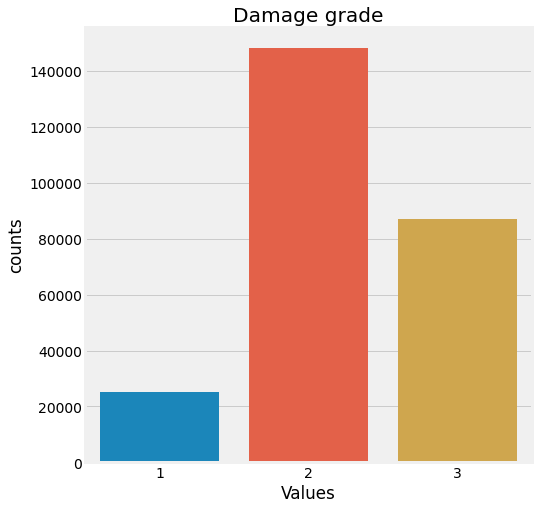

In [11]:
plt.figure(figsize=(8,8))
plt.style.use('fivethirtyeight')
sns.countplot(train_labels['damage_grade'])
plt.xlabel('Values'); plt.ylabel('counts'); 
plt.title('Damage grade')

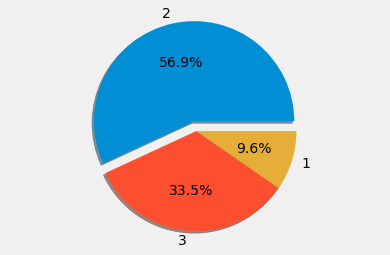

In [13]:
percent = list(train_values['damage_grade'].value_counts()/len(train_values['damage_grade'])*100)
label = list(train_values['damage_grade'].value_counts().index)
explode = (0.1,0,0)
fig,ax1 = plt.subplots()
ax1.pie(percent, explode=explode, labels=label, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

Damage category 2&3 are higher than 1

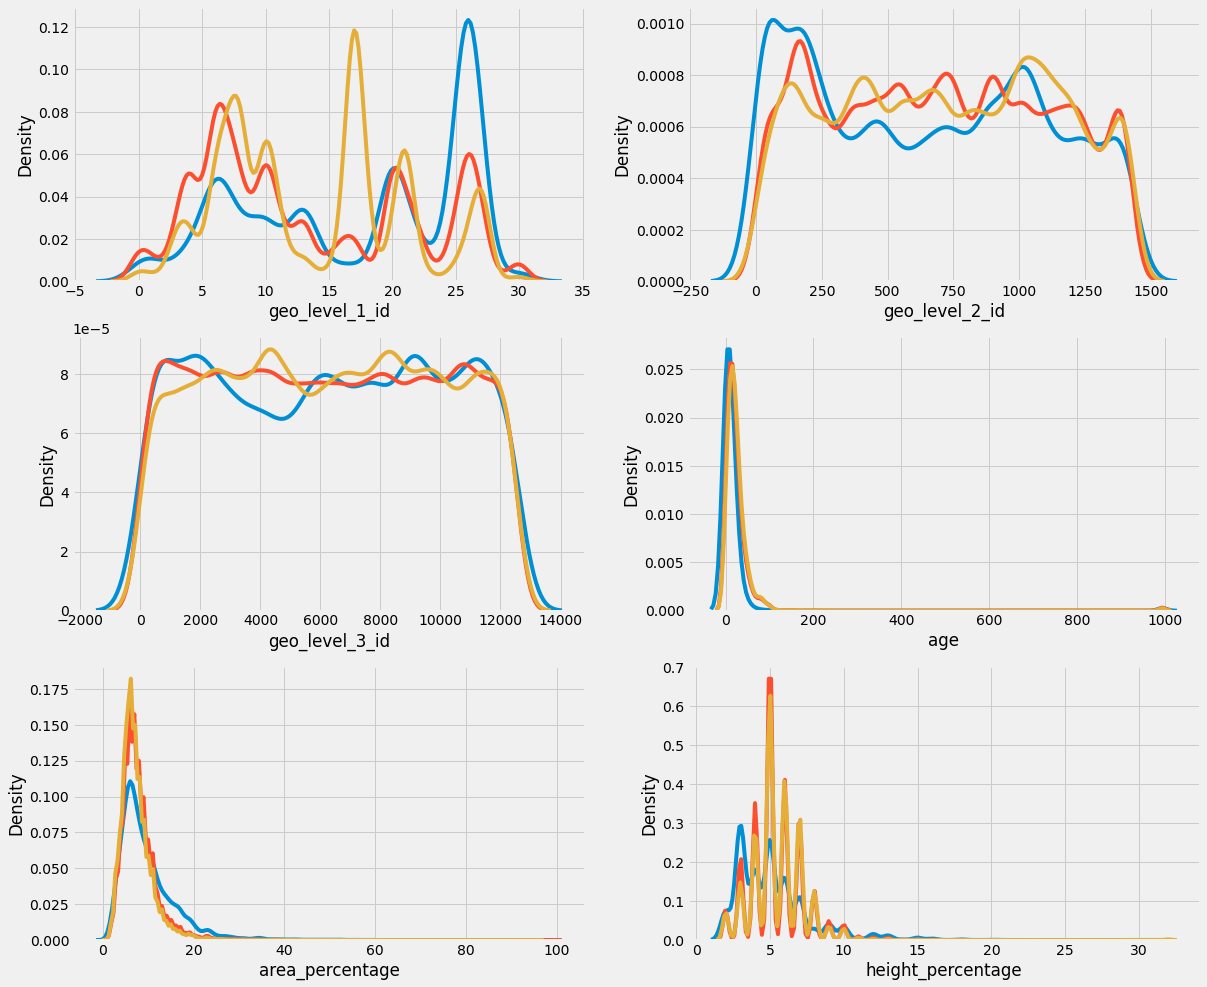

In [16]:
cont_values = ['geo_level_1_id','geo_level_2_id','geo_level_3_id','age','area_percentage','height_percentage']

def densityPlot(cont_values):
  fig = plt.figure(figsize=(18,16))
  plt.style.use('fivethirtyeight')
  for i,txt in enumerate(cont_values):
    ax = fig.add_subplot(3,2,i+1)
    sns.kdeplot(train_values.loc[train_values['damage_grade'] == 1, txt], ax=ax, label='damage_grade==1')
    sns.kdeplot(train_values.loc[train_values['damage_grade'] == 2, txt], ax=ax, label='damage_grade==2')
    sns.kdeplot(train_values.loc[train_values['damage_grade'] == 3, txt], ax=ax, label='damage_grade==3')
  plt.show()
densityPlot(cont_values)

From plotting continuous feature values using kdeplot (kernel density plot), we can see there is few changes in pattern on columns geo_level_1_id,geo_level_2_id which will help us for better prediction

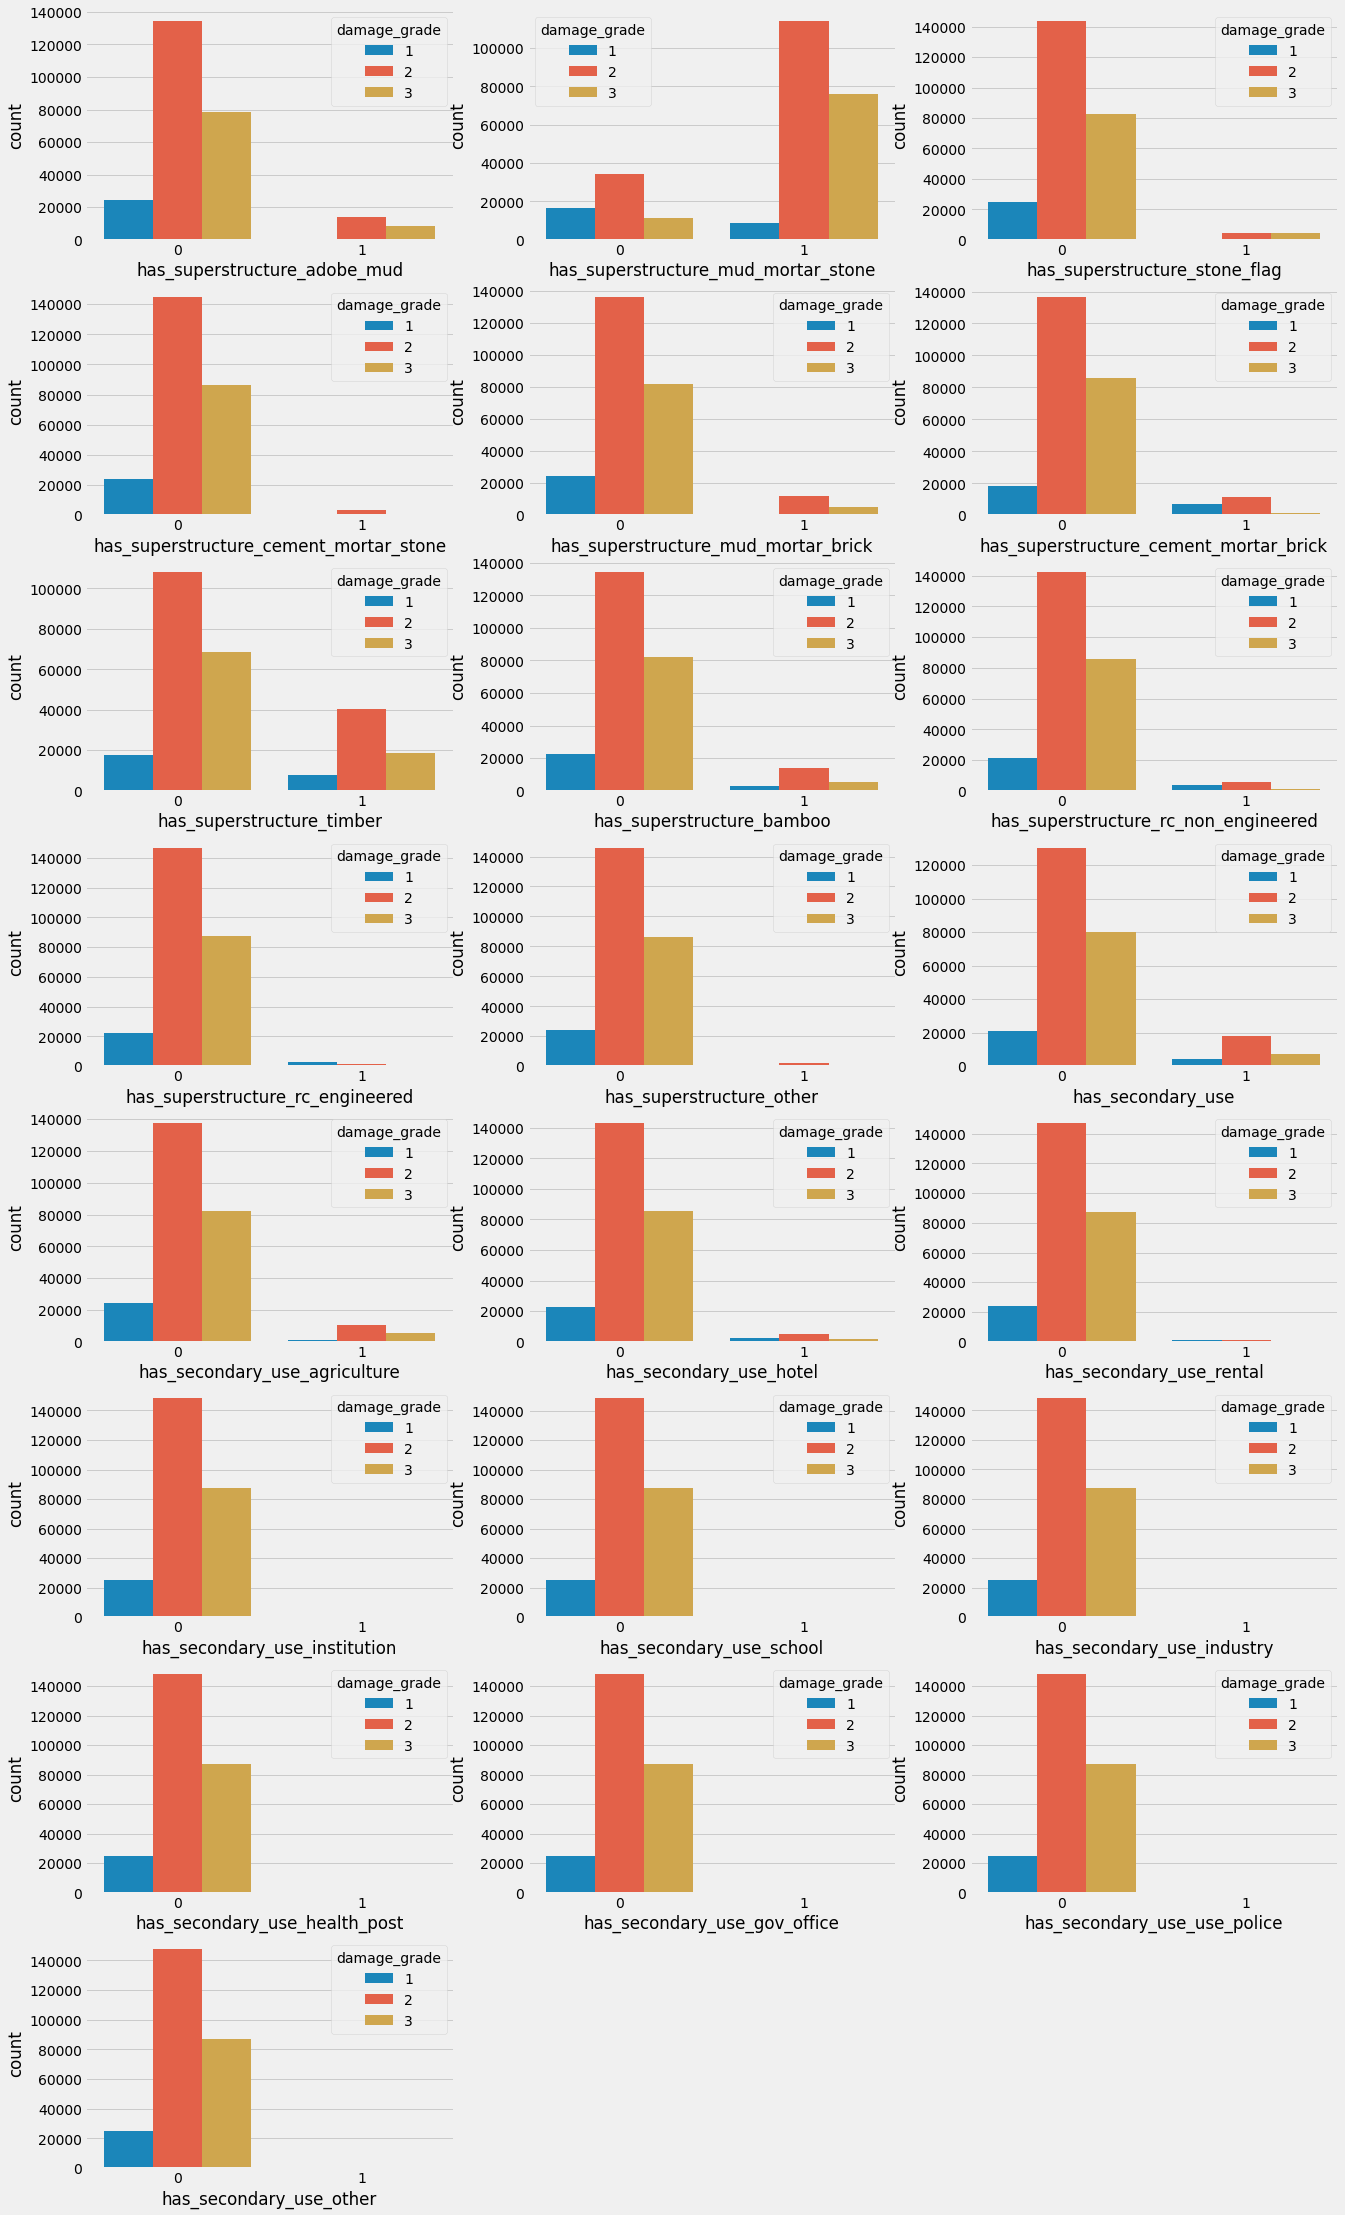

In [19]:
bin_cols = train_values.columns[train_values.columns.str.startswith('has')]

def countPlot(bin_cols):
  plt.rcParams['font.size'] = 18
  plt.style.use('fivethirtyeight')
  fig = plt.figure(figsize=(20,37))
  for i,txt in enumerate(bin_cols):
    ax = fig.add_subplot(8,3,i+1)
    sns.countplot(x=train_values[txt], ax=ax, hue=train_values['damage_grade'])
  plt.show()
countPlot(bin_cols)




    All binary columns have more zero than 1, except has_superstructure_cement_mortar_stone
    In some columns there seems having only single value like all 0's, need to check.



### count plot on Categorical Columns

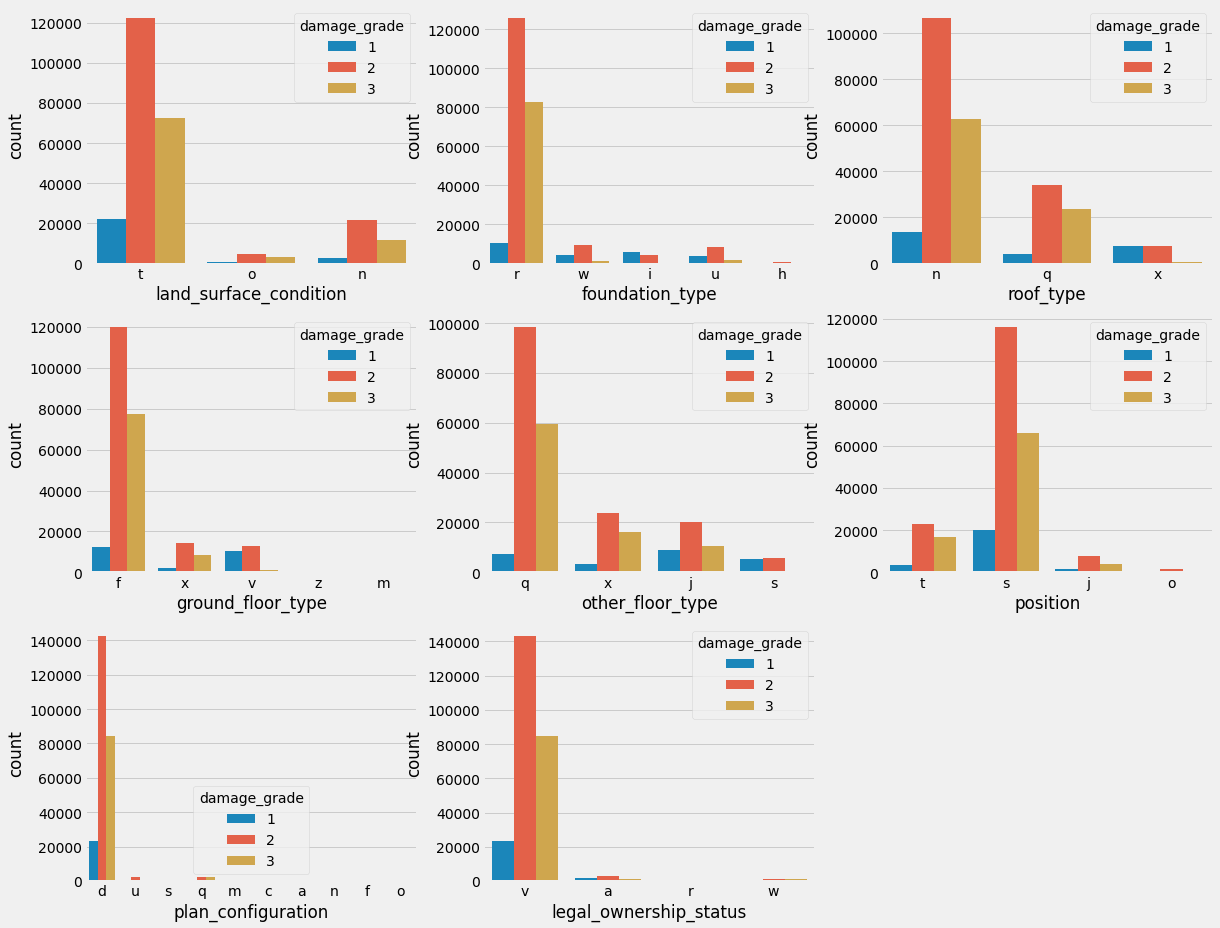

In [20]:
cat_cols = train_values.select_dtypes(include=np.object).columns

def catPlot(cat_cols):
  plt.rcParams['font.size'] = 18
  plt.style.use('fivethirtyeight')
  fig = plt.figure(figsize=(18,15))
  for i,txt in enumerate(cat_cols):
    ax = fig.add_subplot(3,3,i+1)
    sns.countplot(x=train_values[txt], ax=ax, hue=train_values['damage_grade'])
  plt.show()
catPlot(cat_cols)

## feature engineering

In [23]:
df_full = pd.concat([train_values], axis=0).reset_index(drop=True)
df_full.shape

(260601, 40)

In [24]:
def merge_by_concat(df1, df2, merge_on):
  merged_gf = df1[merge_on]
  merged_gf = merged_gf.merge(df2, on=merge_on, how='left')
  new_columns = [col for col in list(merged_gf) if col not in merge_on]
  df1 = pd.concat([df1, merged_gf[new_columns]], axis=1)
  return df1

In [25]:
eo_age_mean = df_full.groupby(['geo_level_1_id','geo_level_2_id','geo_level_3_id'])['age'].agg(['mean']).reset_index().rename(columns={'mean':'geo_grp_age_mean'})
geo_height_mean = df_full.groupby(['geo_level_1_id','geo_level_2_id','geo_level_3_id'])['height_percentage'].agg(['mean']).reset_index().rename(columns={'mean':'geo_grp_height_mean'})
geo_area_mean = df_full.groupby(['geo_level_1_id','geo_level_2_id','geo_level_3_id'])['area_percentage'].agg(['mean']).reset_index().rename(columns={'mean':'geo_grp_area_mean'})

In [26]:
type_age_mean = df_full.groupby(['foundation_type','roof_type','ground_floor_type','other_floor_type'])['age'].agg(['mean']).reset_index().rename(columns={'mean':'type_grp_age_mean'})
type_height_mean = df_full.groupby(['foundation_type','roof_type','ground_floor_type','other_floor_type'])['height_percentage'].agg(['mean']).reset_index().rename(columns={'mean':'type_grp_height_mean'})
type_area_mean = df_full.groupby(['foundation_type','roof_type','ground_floor_type','other_floor_type'])['area_percentage'].agg(['mean']).reset_index().rename(columns={'mean':'type_grp_area_mean'})

In [28]:
colname=[]
val=[]
bin_cols = df_full.columns[df_full.columns.str.contains('has')]
for bcol in bin_cols:
  colname.append(bcol)
  val.append(df_full[bcol].value_counts().sort_index().values)
pd.DataFrame(val, index=colname)

,0,1
has_superstructure_adobe_mud,237500,23101
has_superstructure_mud_mortar_stone,62040,198561
has_superstructure_stone_flag,251654,8947
has_superstructure_cement_mortar_stone,255849,4752
has_superstructure_mud_mortar_brick,242840,17761
has_superstructure_cement_mortar_brick,240986,19615
has_superstructure_timber,194151,66450
has_superstructure_bamboo,238447,22154
has_superstructure_rc_non_engineered,249502,11099
has_superstructure_rc_engineered,256468,4133


In [29]:
freq_cols = ['land_surface_condition','foundation_type','roof_type',
             'ground_floor_type','other_floor_type','position','plan_configuration',
             'legal_ownership_status']

def frequency_encode(cols, df, self_encoding=False):
  for c in cols:
    fq_dict = df[c].value_counts().to_dict()
    if self_encoding:
      df[c] = df[c].map(fq_dict)
    else:
      df[c+'fq_enc'] = df[c].map(fq_dict)
  return df
df_full_freq = frequency_encode(freq_cols, df_full, self_encoding=True)

In [30]:
train_new = df_full_freq[:train_values.shape[0]]
test_new = df_full_freq[train_values.shape[0]:]

In [32]:
corr_matrix = train_new.drop(columns=['building_id','damage_grade'], axis=1).corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]
print('Number of columns having collinearity with other columns other than target: ', len(to_drop))

Number of columns having collinearity with other columns other than target:  0


# Model Creation


### function to check f1 score of model

In [36]:
def check_model_f1_score(model):
  model.fit(X_train, y_train)
  test_y_pred = model.predict(X_test)
  return f1_score(y_test, test_y_pred, average='micro')

Spliting train data as 75% as train & remaining as test data for validating our model

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Let us create a base prediction, by guessing damage grade value. Here we may do value_counts and select the grade with most value counts as the guessing damage grade prediction value. Using that value let us check base prediction to check our trained model score need to cross more than the base model.

In [38]:
grade_guess = y_test.value_counts().index[0]
base_prediction = np.full(np.shape(y_test), grade_guess)
print('F1 score of base prediction with guess value: ',f1_score(y_test, base_prediction, average='micro'))

F1 score of base prediction with guess value:  0.5680919916603778


In [39]:
lr = LogisticRegression(multi_class='multinomial')
lr_score = check_model_f1_score(lr)
print('Basic LOGISTIC REGRESSION model with default params: ', lr_score)

Basic LOGISTIC REGRESSION model with default params:  0.5645617221575575


In [40]:
dc = DecisionTreeClassifier()
dc_score = check_model_f1_score(dc)
print('DECISION CLASSIFIER model with default params: ', dc_score)

DECISION CLASSIFIER model with default params:  0.6560929126002482


In [41]:
rc = RandomForestClassifier()
rc_score = check_model_f1_score(rc)
print('Basic RANDOM FOREST model with default params: ', rc_score)

Basic RANDOM FOREST model with default params:  0.7183714713293511


In [42]:
knc = KNeighborsClassifier()
knc_score = check_model_f1_score(knc)
print('KNEIGHBORS model with default params: ', knc_score)

KNEIGHBORS model with default params:  0.6589836405264706


In [43]:
xg = xgb.XGBClassifier()
xg_score = check_model_f1_score(xg)
print('XGB model with default params: ', xg_score)

[16:58:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB model with default params:  0.7279262224837236


<Figure size 576x432 with 0 Axes>

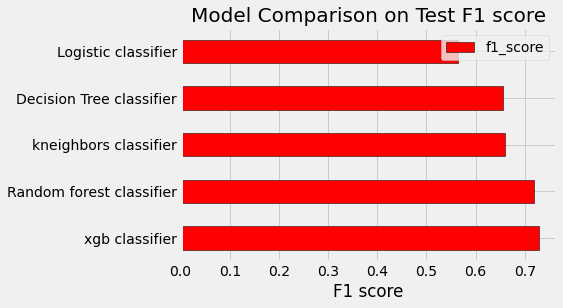

In [44]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,6))
model_comparison = pd.DataFrame({'model':['Logistic classifier','Decision Tree classifier',
                       'Random forest classifier', 'kneighbors classifier',
                       'xgb classifier'], 'f1_score':[lr_score,dc_score,rc_score,
                                                      knc_score,xg_score]})

# Horizontal bar chart of test mae
model_comparison.sort_values('f1_score', ascending = False).plot(x = 'model', y = 'f1_score', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('F1 score'); plt.xticks(size = 14)
plt.title('Model Comparison on Test F1 score', size = 20);

In [45]:
clf = xgb.XGBClassifier(
    n_estimators=2000,
    objective='multi:softmax',
    num_class=3,
    max_depth=12, 
    learning_rate=0.02, 
    subsample=0.8,
    colsample_bytree=0.4, 
    missing=-1, 
    eval_metric='mlogloss',
    nthread=4,
    tree_method='hist'     
    )

In [46]:
clf.fit(X_train, y_train, eval_set=[(X_test,y_test)],verbose=50, early_stopping_rounds=100)

[0]	validation_0-mlogloss:1.08773
[50]	validation_0-mlogloss:0.83057
[100]	validation_0-mlogloss:0.72478
[150]	validation_0-mlogloss:0.67401
[200]	validation_0-mlogloss:0.64462
[250]	validation_0-mlogloss:0.62790
[300]	validation_0-mlogloss:0.61526
[350]	validation_0-mlogloss:0.60620
[400]	validation_0-mlogloss:0.59981
[450]	validation_0-mlogloss:0.59488
[500]	validation_0-mlogloss:0.59053
[550]	validation_0-mlogloss:0.58767
[600]	validation_0-mlogloss:0.58531
[650]	validation_0-mlogloss:0.58342
[700]	validation_0-mlogloss:0.58145
[750]	validation_0-mlogloss:0.57967
[800]	validation_0-mlogloss:0.57832
[850]	validation_0-mlogloss:0.57723
[900]	validation_0-mlogloss:0.57612
[950]	validation_0-mlogloss:0.57504
[1000]	validation_0-mlogloss:0.57435
[1050]	validation_0-mlogloss:0.57379
[1100]	validation_0-mlogloss:0.57325
[1150]	validation_0-mlogloss:0.57255
[1200]	validation_0-mlogloss:0.57214
[1250]	validation_0-mlogloss:0.57168
[1300]	validation_0-mlogloss:0.57135
[1350]	validation_0-mlog

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4,
              enable_categorical=False, eval_metric='mlogloss', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=-1, monotone_constraints='()',
              n_estimators=2000, n_jobs=4, nthread=4, num_class=3,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=0.8, tree_method='hist', ...)

In [51]:
xgb_score = check_model_f1_score(clf)
print('XGB score with tuned params: ', xgb_score)

XGB score with tuned params:  0.7461915299113595
